# FASHION-MNIST DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers.legacy import SGD

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Fashion-MNIST is a dataset of images consisting of 10 different fashion categories, with 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding fashion category. The Fashion-MNIST dataset is often used as a drop-in replacement for the original MNIST dataset, as it is more challenging and better represents real-world computer vision tasks.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))

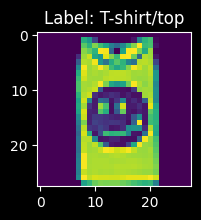

In [9]:
plot_sample(101)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
ann = Sequential(
    layers=[
        Flatten(input_shape=(28, 28), name="input_layer"),
        Dense(128, activation="relu", name="hidden_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Dense(64, activation="relu", name="hidden_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Dense(10, activation="softmax", name="output_layer"),
    ],
    name="ann",
)

2023-08-07 01:11:30.505765: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-07 01:11:30.505812: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-07 01:11:30.505833: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-07 01:11:30.506130: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-07 01:11:30.506157: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
ann.layers

In [13]:
ann.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 dropout_layer_1 (Dropout)   (None, 128)               0         
                                                                 
 hidden_layer_2 (Dense)      (None, 64)                8256      
                                                                 
 dropout_layer_2 (Dropout)   (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.

In [14]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)
epochs = 10
ann.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_ann",
    monitor="val_accuracy",
    save_best_only=True,
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_ann_logs", histogram_freq=1, write_images=True
)
ann_csvlogger_callback = CSVLogger("../Logs/fashion-mnist_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/10


2023-08-07 01:11:31.312830: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 1.3806 - accuracy: 0.5024

2023-08-07 01:11:35.919002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 5s 11ms/step - loss: 1.3806 - accuracy: 0.5024 - val_loss: 0.8061 - val_accuracy: 0.7115
Epoch 2/10
416/422 [============================>.] - ETA: 0s - loss: 0.8716 - accuracy: 0.6811INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 7ms/step - loss: 0.8709 - accuracy: 0.6815 - val_loss: 0.6702 - val_accuracy: 0.7578
Epoch 3/10
415/422 [============================>.] - ETA: 0s - loss: 0.7492 - accuracy: 0.7297INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 8ms/step - loss: 0.7490 - accuracy: 0.7300 - val_loss: 0.6085 - val_accuracy: 0.7860
Epoch 4/10
418/422 [============================>.] - ETA: 0s - loss: 0.6819 - accuracy: 0.7587INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 8ms/step - loss: 0.6816 - accuracy: 0.7588 - val_loss: 0.5762 - val_accuracy: 0.7948
Epoch 5/10
421/422 [============================>.] - ETA: 0s - loss: 0.6407 - accuracy: 0.7751INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 7ms/step - loss: 0.6407 - accuracy: 0.7752 - val_loss: 0.5518 - val_accuracy: 0.8093
Epoch 6/10
422/422 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.7849INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 6ms/step - loss: 0.6141 - accuracy: 0.7849 - val_loss: 0.5327 - val_accuracy: 0.8187
Epoch 7/10
418/422 [============================>.] - ETA: 0s - loss: 0.5910 - accuracy: 0.7954INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 7ms/step - loss: 0.5911 - accuracy: 0.7951 - val_loss: 0.5223 - val_accuracy: 0.8188
Epoch 8/10
420/422 [============================>.] - ETA: 0s - loss: 0.5780 - accuracy: 0.7978INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 6ms/step - loss: 0.5782 - accuracy: 0.7977 - val_loss: 0.5111 - val_accuracy: 0.8250
Epoch 9/10
414/422 [============================>.] - ETA: 0s - loss: 0.5654 - accuracy: 0.8044INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 7ms/step - loss: 0.5648 - accuracy: 0.8044 - val_loss: 0.5010 - val_accuracy: 0.8272
Epoch 10/10
419/422 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.8072INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_ann/assets


422/422 [==============================] - 3s 7ms/step - loss: 0.5538 - accuracy: 0.8076 - val_loss: 0.4937 - val_accuracy: 0.8273


In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["accuracy"]
ann_val_acc = ann_history.history["val_accuracy"]
ann_val_loss = ann_history.history["val_loss"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.7224665999412536
Validation loss: 0.5773490577936172
0.743750 Training accuracy with a standard deviation of 0.088596
0.797650 Validation accuracy with a standard deviation of 0.035606


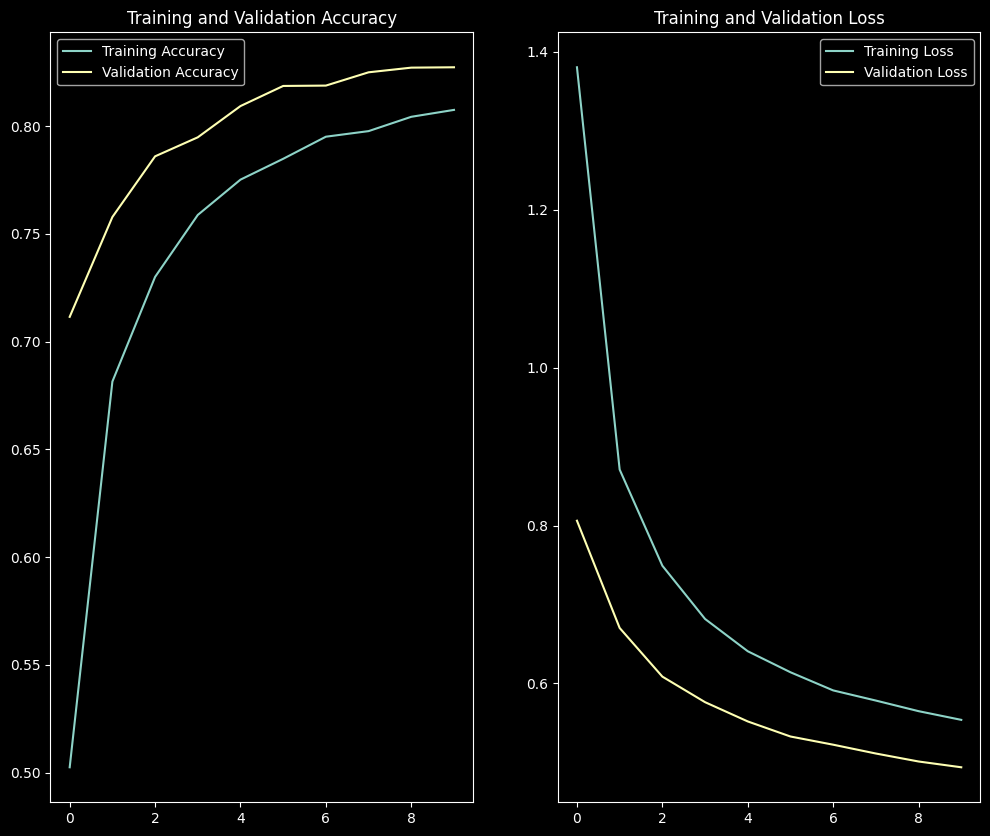

In [17]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.5250 - accuracy: 0.8174
Test loss: 0.5250415205955505
Test accuracy: 0.8173999786376953


In [19]:
y_pred = ann.predict(X_test)

 94/313 [========>.....................] - ETA: 0s

2023-08-07 01:12:04.743565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [20]:
cnn = Sequential(
    layers=[
        Conv2D(
            filters=64,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            input_shape=(28, 28, 1),
            name="conv_layer_1",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_1"),
        Dropout(0.2, name="dropout_layer_1"),
        Conv2D(
            filters=128,
            kernel_size=(3, 3),
            activation="relu",
            padding="same",
            name="conv_layer_2",
        ),
        MaxPooling2D((2, 2), name="pooling_layer_2"),
        Dropout(0.2, name="dropout_layer_2"),
        Flatten(name="flatten_layer"),
        Dense(128, activation="relu", name="dense_layer_1"),
        Dense(10, activation="softmax", name="final_layer"),
    ],
    name="cnn",
)

In [21]:
cnn.layers

In [22]:
cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_layer_1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 pooling_layer_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_layer_1 (Dropout)   (None, 14, 14, 64)        0         
                                                                 
 conv_layer_2 (Conv2D)       (None, 14, 14, 128)       73856     
                                                                 
 pooling_layer_2 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 dropout_layer_2 (Dropout)   (None, 7, 7, 128)         0       

In [23]:
cnn.compile(
    optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

In [24]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_cnn",
    monitor="val_accuracy",
    save_best_only=True,
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_cnn_logs", histogram_freq=1, write_images=True
)
cnn_csvlogger_callback = CSVLogger("../Logs/fashion-mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=128,
    epochs=epochs,
    validation_split=0.1,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/10


2023-08-07 01:12:06.066051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.5522

2023-08-07 01:12:17.167969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 12s 27ms/step - loss: 1.2731 - accuracy: 0.5522 - val_loss: 0.7180 - val_accuracy: 0.7292
Epoch 2/10
422/422 [==============================] - ETA: 0s - loss: 0.6959 - accuracy: 0.7483INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 12s 28ms/step - loss: 0.6959 - accuracy: 0.7483 - val_loss: 0.6620 - val_accuracy: 0.7468
Epoch 3/10
422/422 [==============================] - ETA: 0s - loss: 0.6122 - accuracy: 0.7792INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 16s 37ms/step - loss: 0.6122 - accuracy: 0.7792 - val_loss: 0.5798 - val_accuracy: 0.7917
Epoch 4/10
422/422 [==============================] - ETA: 0s - loss: 0.5762 - accuracy: 0.7923INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 19s 45ms/step - loss: 0.5762 - accuracy: 0.7923 - val_loss: 0.5417 - val_accuracy: 0.8008
Epoch 5/10
422/422 [==============================] - ETA: 0s - loss: 0.5441 - accuracy: 0.8049INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 32s 76ms/step - loss: 0.5441 - accuracy: 0.8049 - val_loss: 0.5140 - val_accuracy: 0.8117
Epoch 6/10
422/422 [==============================] - ETA: 0s - loss: 0.5224 - accuracy: 0.8129INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 32s 75ms/step - loss: 0.5224 - accuracy: 0.8129 - val_loss: 0.4895 - val_accuracy: 0.8217
Epoch 7/10
422/422 [==============================] - 32s 75ms/step - loss: 0.5089 - accuracy: 0.8185 - val_loss: 0.4869 - val_accuracy: 0.8200
Epoch 8/10
422/422 [==============================] - ETA: 0s - loss: 0.4906 - accuracy: 0.8249INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 35s 83ms/step - loss: 0.4906 - accuracy: 0.8249 - val_loss: 0.4881 - val_accuracy: 0.8253
Epoch 9/10
422/422 [==============================] - ETA: 0s - loss: 0.4767 - accuracy: 0.8306INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 35s 84ms/step - loss: 0.4767 - accuracy: 0.8306 - val_loss: 0.4690 - val_accuracy: 0.8310
Epoch 10/10
422/422 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.8335INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


INFO:tensorflow:Assets written to: ../Models/fashion-mnist_cnn/assets


422/422 [==============================] - 30s 68ms/step - loss: 0.4699 - accuracy: 0.8335 - val_loss: 0.4687 - val_accuracy: 0.8313


In [25]:
cnn_train_acc = cnn_history.history["accuracy"]
cnn_val_acc = cnn_history.history["val_accuracy"]
cnn_train_loss = cnn_history.history["loss"]
cnn_val_loss = cnn_history.history["val_loss"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.6170115679502487
Validation loss: 0.5417728066444397
0.779722 Training accuracy with a standard deviation of 0.079799
0.800950 Validation accuracy with a standard deviation of 0.033905


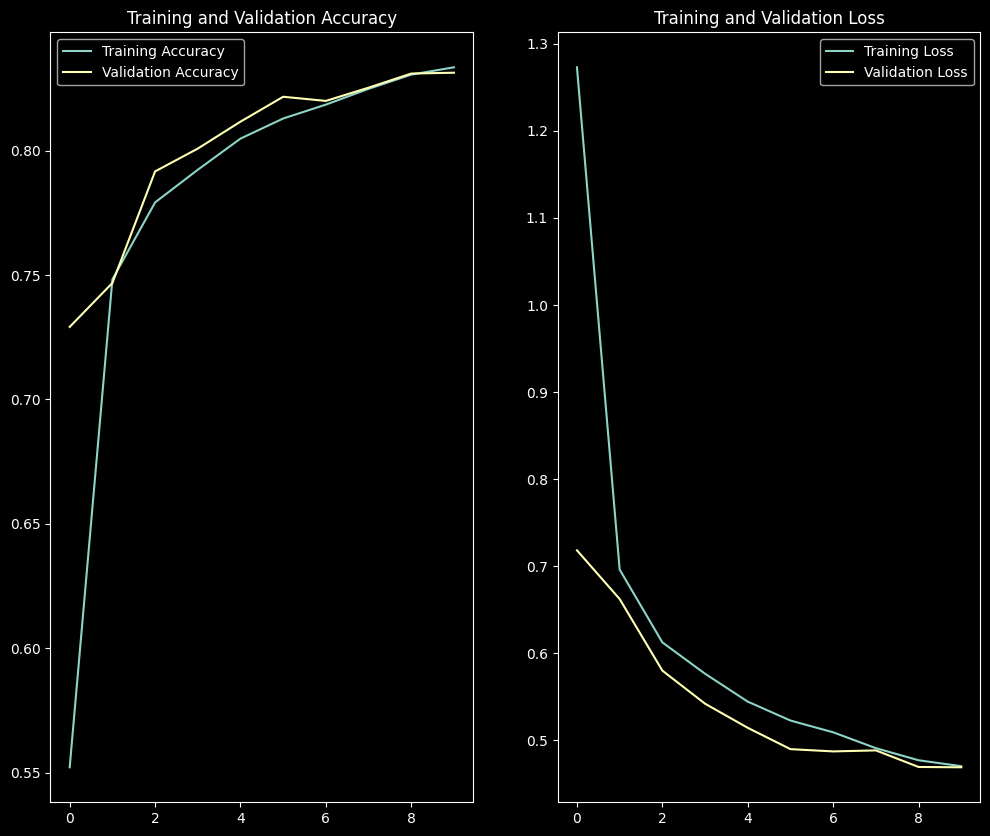

In [26]:
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_cnn_acc_loss.png", bbox_inches="tight")

In [27]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 [==============================] - 10s 30ms/step - loss: 0.4922 - accuracy: 0.8262
Test loss: 0.4922412633895874
Test accuracy: 0.826200008392334


In [28]:
y_pred = cnn.predict(X_test)

2023-08-07 01:16:37.497858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 11ms/step
